# Linear mixed model evaluation

In [5]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import dill

In [9]:
# Import utility functions from the repository
from core.utils.visualization import (
    plot_observed_and_predicted_distributions,
    plot_calibration_and_residuals,
    plot_calibration_by_group,
    plot_residuals_by_group,
    print_evaluation_metrics_train,
    print_evaluation_metrics_crossval,
)
from core.utils import visualization_settings

In [6]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

## Load data and extract variables

In [50]:
# ALPHA DIVERSITY RUNS

# 1. Study slopes + block intercepts (BII benchmark)
# Train: run_folder_2025-01-13_11.53
# Random CV: run_folder_2025-01-13_09.54
# Spatial CV: run_folder_2025-01-13_11.15
# Environmental CV:

# 2. Study and block intercepts

# BETA DIVERSITY RUNS

In [51]:
# -- TRAINING -- data
training_path = "../../data/runs/run_folder_2025-01-13_11.53/training_output.pkl"
with open(training_path, "rb") as in_stream:
    training_output = dill.load(in_stream)

# -- RANDOM CV -- data
random_cv_path = "../../data/runs/run_folder_2025-01-13_09.54/cv_output.pkl"
with open(random_cv_path, "rb") as in_stream:
    random_cv_output = dill.load(in_stream)

# -- SPATIAL CV -- data
spatial_cv_path = "../../data/runs/run_folder_2025-01-13_11.15/cv_output.pkl"
with open(spatial_cv_path, "rb") as in_stream:
    spatial_cv_output = dill.load(in_stream)

# -- ENVIRONMENTAL CV -- data
# To be added

In [52]:
# TRAINING data variables

model_data_train = training_output["data"]
df_pred_train = training_output["state_predictions"]
state_metrics_train = training_output["state_metrics"]
df_pred_change_train = training_output["change_predictions"]
change_metrics_train = training_output["change_metrics"]

# Extract variables for analysis and plotting
y_true_train = df_pred_train.get_column("Observed").to_numpy()
y_pred_train = df_pred_train.get_column("Predicted_RE").to_numpy()
y_res_train = df_pred_train.get_column("Residuals_RE").to_numpy()

y_true_change_train = df_pred_change_train.get_column("Delta_observed").to_numpy()
y_pred_change_train = df_pred_change_train.get_column("Delta_predicted_RE").to_numpy()
y_res_change_train = df_pred_change_train.get_column("Delta_residuals_RE").to_numpy()

# Variables before back-transformation
y_true_train_trans = df_pred_train.get_column("Observed_transformed").to_numpy()
y_pred_train_trans = df_pred_train.get_column("Predicted_RE_transformed").to_numpy()
# y_res_train_trans = df_pred_train.get_column("Residuals_RE").to_numpy()

In [26]:
# RANDOM CV data variables

model_data_random_cv = random_cv_output["data"]
df_pred_random_cv = random_cv_output["state_predictions"]
state_metrics_random_cv = random_cv_output["state_metrics"]
df_pred_change_random_cv = random_cv_output["change_predictions"]
change_metrics_random_cv = random_cv_output["change_metrics"]

# Based on concatenated test folds
df_pred_all_random_cv = random_cv_output["all_test_results"]["state_predictions"]
state_metrics_all_random_cv = random_cv_output["all_test_results"]["state_metrics"]
df_pred_change_all_random_cv = random_cv_output["all_test_results"][
    "change_predictions"
]
change_metrics_all_random_cv = random_cv_output["all_test_results"]["change_metrics"]

# Extract variables for analysis and plotting
y_true_random_cv = df_pred_all_random_cv.get_column("Observed").to_numpy()
y_pred_random_cv = df_pred_all_random_cv.get_column("Predicted_FE").to_numpy()
y_res_random_cv = df_pred_all_random_cv.get_column("Residuals_FE").to_numpy()

y_true_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_observed"
).to_numpy()
y_pred_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_predicted_FE"
).to_numpy()
y_res_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_residuals_FE"
).to_numpy()

In [39]:
# SPATIAL CV data variables

model_data_spatial_cv = spatial_cv_output["data"]
df_pred_spatial_cv = spatial_cv_output["state_predictions"]
state_metrics_spatial_cv = spatial_cv_output["state_metrics"]
df_pred_change_spatial_cv = spatial_cv_output["change_predictions"]
change_metrics_spatial_cv = spatial_cv_output["change_metrics"]

# Based on concatenated test folds
df_pred_all_spatial_cv = spatial_cv_output["all_test_results"]["state_predictions"]
state_metrics_all_spatial_cv = spatial_cv_output["all_test_results"]["state_metrics"]
df_pred_change_all_spatial_cv = spatial_cv_output["all_test_results"][
    "change_predictions"
]
change_metrics_all_spatial_cv = spatial_cv_output["all_test_results"]["change_metrics"]

# Extract variables for analysis and plotting
y_true_spatial_cv = df_pred_all_spatial_cv.get_column("Observed").to_numpy()
y_pred_spatial_cv = df_pred_all_spatial_cv.get_column("Predicted_FE").to_numpy()
y_res_spatial_cv = df_pred_all_spatial_cv.get_column("Residuals_FE").to_numpy()

y_true_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_observed"
).to_numpy()
y_pred_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_predicted_FE"
).to_numpy()
y_res_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_residuals_FE"
).to_numpy()

## --- Training data evaluation ---

### Training: Distribution of observed and predicted values

#### Back-transformed values (squared)

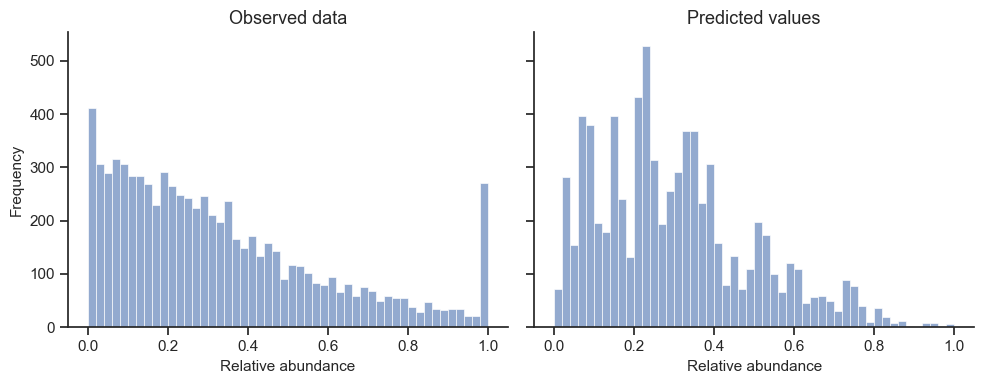

In [53]:
plot_observed_and_predicted_distributions(y_true=y_true_train, y_pred=y_pred_train)

#### Before back-transformation

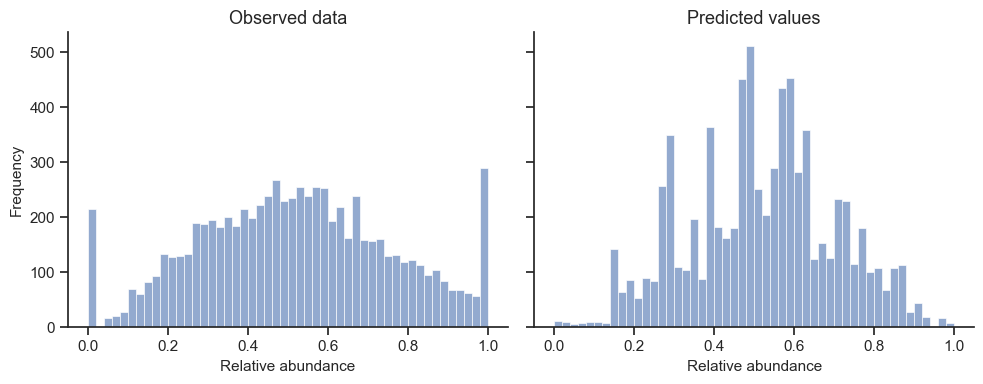

In [54]:
plot_observed_and_predicted_distributions(
    y_true=y_true_train_trans, y_pred=y_pred_train_trans
)

### Training: Summary performance metrics

#### Back-transformed values (squared)

In [55]:
print_evaluation_metrics_train(state_metrics_train)

MKodel performance metrics
Overall metrics:
  - R² (standard def): 0.604
  - R² (variance explained): 0.583
  - Mean absolute error: 0.113
  - Median absolute error: 0.078
  - Pearson correlation: 0.785
  - Spearman correlation: 0.803
  - Bias ratio (pred/obs): 0.924

Bottom quartile metrics:
  - R² (standard def): -5.867
  - R² (variance explained): 0.556
  - Mean absolute error: 0.066
  - Median absolute error: 0.044
  - Pearson correlation: 0.448
  - Spearman correlation: 0.525
  - Bias ratio (pred/obs): 2.093

Top quartile metrics:
  - R² (standard def): -1.440
  - R² (variance explained): 0.449
  - Mean absolute error: 0.209
  - Median absolute error: 0.164
  - Pearson correlation: 0.375
  - Spearman correlation: 0.389
  - Bias ratio (pred/obs): 0.733



#### R2 before back-transformation

In [62]:
print(f"R2 (std, not back-transformed): {state_metrics_train['r2_std_trans']:.3f}")
print(f"R2 (var expl, not back-transformed): {state_metrics_train['r2_var_trans']:.3f}")

R2 (std, not back-transformed): 0.648
R2 (var expl, not back-transformed): 0.621


### Training: Calibration and residual plots

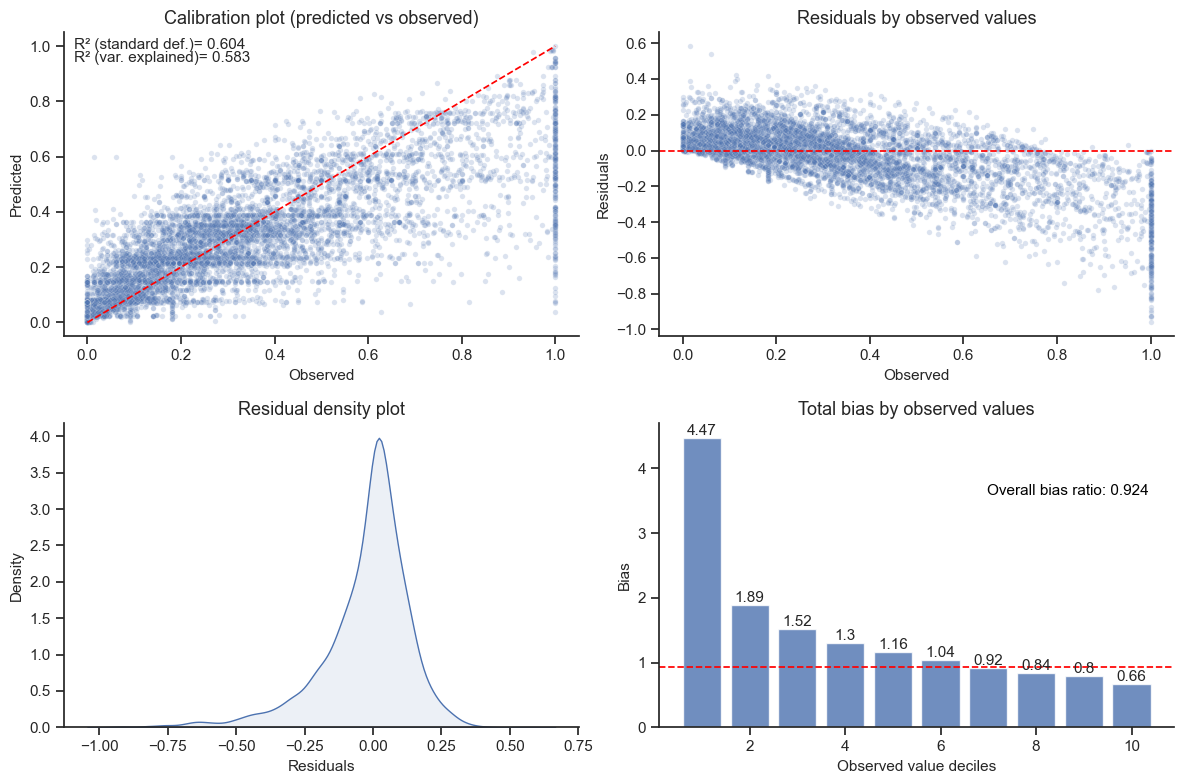

In [63]:
plot_calibration_and_residuals(
    y_true=y_true_train,
    y_pred=y_pred_train,
    y_residual=y_res_train,
    metrics=state_metrics_train,
)

In [ ]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_train,
    y_pred=y_pred_train,
    group_idx=train_data["level_2_idx"],
    group_mapping=level_2_mapping,
)

### Training: Approximation of change predictions

In [19]:
print_evaluation_metrics_train(change_metrics_train)

MKodel performance metrics
Overall metrics:
  - R² (standard def): 0.374
  - R² (variance explained): 0.320
  - Mean absolute error: 0.134
  - Median absolute error: 0.091
  - Pearson correlation: 0.616
  - Spearman correlation: 0.597
  - Bias ratio (pred/obs): 0.387

Bottom quartile metrics:
  - R² (standard def): -1.403
  - R² (variance explained): 0.373
  - Mean absolute error: 0.200
  - Median absolute error: 0.165
  - Pearson correlation: 0.338
  - Spearman correlation: 0.324
  - Bias ratio (pred/obs): 0.359

Top quartile metrics:
  - R² (standard def): -1.215
  - R² (variance explained): 0.361
  - Mean absolute error: 0.207
  - Median absolute error: 0.166
  - Pearson correlation: 0.357
  - Spearman correlation: 0.306
  - Bias ratio (pred/obs): 0.352



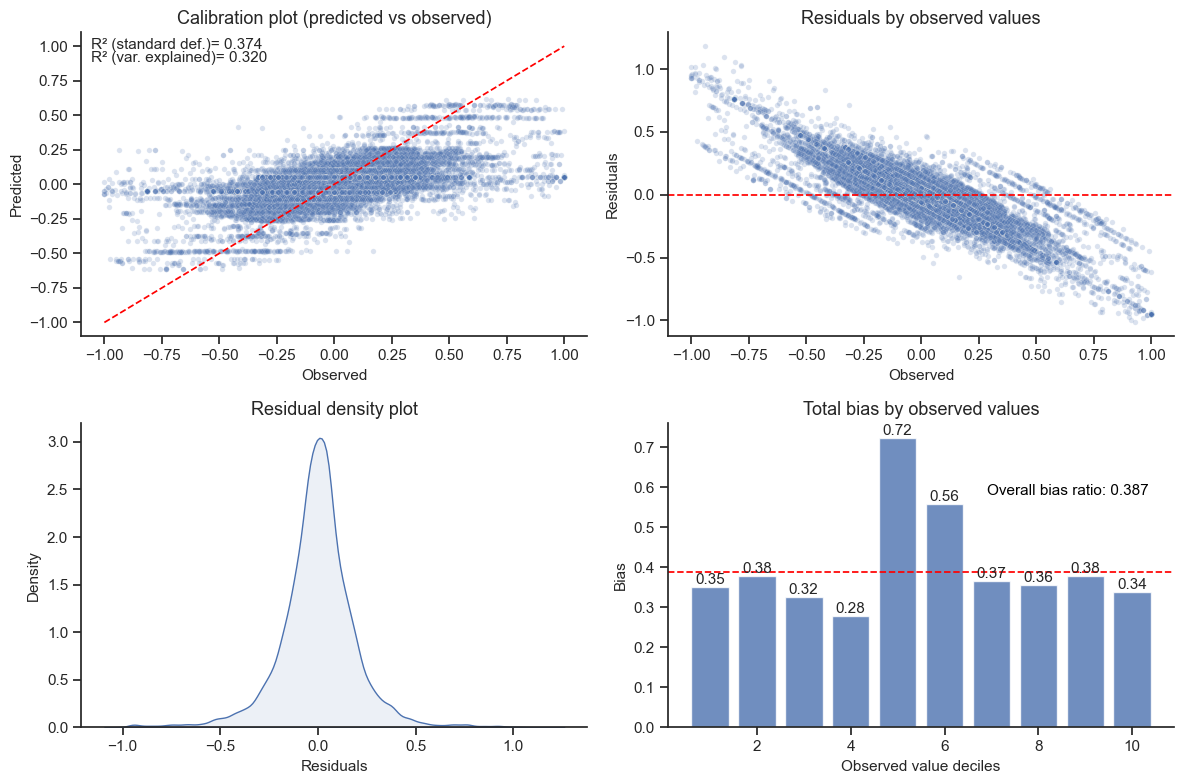

In [20]:
plot_calibration_and_residuals(
    y_true=y_true_change_train,
    y_pred=y_pred_change_train,
    y_residual=y_res_change_train,
    metrics=change_metrics_train,
)

## --- Random cross-validation evaluation ---

### Random CV: Summary performance metrics

In [30]:
print_evaluation_metrics_crossval(state_metrics_random_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
    Test:  mean: -0.077 | min: -0.116 | max: -0.028
    Train: mean: -0.063 | min: -0.080 | max: -0.036
  - R² (variance explained):
    Test:  mean: 0.036 | min: 0.033 | max: 0.044
    Train: mean: 0.035 | min: 0.028 | max: 0.041
  - Mean absolute error:
    Test:  mean: 0.229 | min: 0.227 | max: 0.233
    Train: mean: 0.229 | min: 0.223 | max: 0.233
  - Median absolute error:
    Test:  mean: 0.218 | min: 0.211 | max: 0.221
    Train: mean: 0.218 | min: 0.208 | max: 0.226
  - Pearson correlation:
    Test:  mean: 0.098 | min: 0.047 | max: 0.139
    Train: mean: 0.119 | min: 0.091 | max: 0.163
  - Spearman correlation:
    Test:  mean: 0.132 | min: 0.073 | max: 0.164
    Train: mean: 0.149 | min: 0.137 | max: 0.167
  - Bias ratio (pred/obs):
    Test:  mean: 1.204 | min: 1.142 | max: 1.274
    Train: mean: 1.204 | min: 1.192 | ma

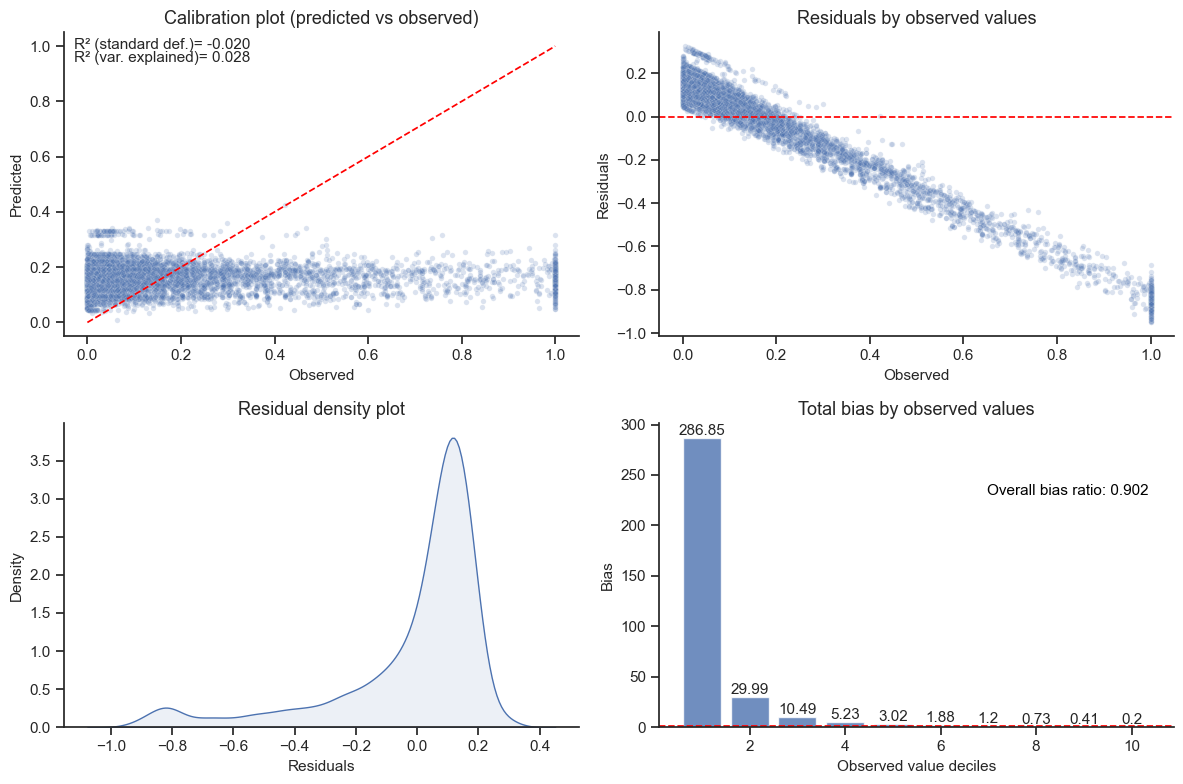

In [32]:
plot_calibration_and_residuals(
    y_true=y_true_random_cv,
    y_pred=y_pred_random_cv,
    y_residual=y_res_random_cv,
    metrics=state_metrics_all_random_cv,
)

In [ ]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_random_cv,
    y_pred=y_pred_random_cv,
    group_idx=level_2_idx_random_cv,
    group_mapping=level_2_mapping,
)

### Random CV: Approximation of change predictions

In [33]:
print_evaluation_metrics_crossval(metrics=change_metrics_random_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
    Test:  mean: -0.094 | min: -0.282 | max: 0.060
    Train: mean: -0.019 | min: -0.046 | max: 0.007
  - R² (variance explained):
    Test:  mean: 0.061 | min: 0.048 | max: 0.092
    Train: mean: 0.056 | min: 0.048 | max: 0.069
  - Mean absolute error:
    Test:  mean: 0.164 | min: 0.145 | max: 0.176
    Train: mean: 0.162 | min: 0.154 | max: 0.169
  - Median absolute error:
    Test:  mean: 0.103 | min: 0.100 | max: 0.107
    Train: mean: 0.105 | min: 0.098 | max: 0.111
  - Pearson correlation:
    Test:  mean: 0.021 | min: -0.202 | max: 0.249
    Train: mean: 0.100 | min: 0.042 | max: 0.150
  - Spearman correlation:
    Test:  mean: 0.138 | min: -0.116 | max: 0.339
    Train: mean: 0.182 | min: 0.145 | max: 0.218
  - Bias ratio (pred/obs):
    Test:  mean: -0.582 | min: -2.743 | max: 0.197
    Train: mean: 0.170 | min: -0.450 |

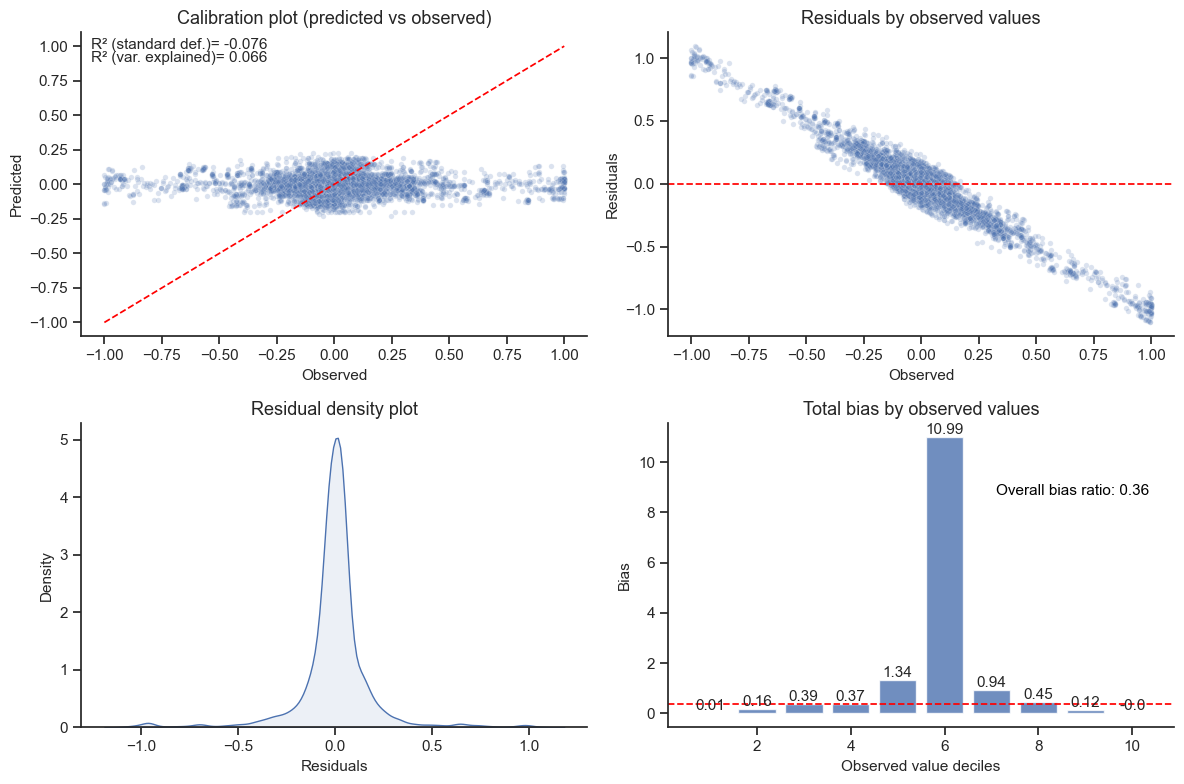

In [34]:
plot_calibration_and_residuals(
    y_true=y_true_change_random_cv,
    y_pred=y_pred_change_random_cv,
    y_residual=y_res_change_random_cv,
    metrics=change_metrics_all_random_cv,
)

## --- Spatial cross-validation evaluation ---

### Spatial CV: Summary performance metrics

In [40]:
print_evaluation_metrics_crossval(metrics=state_metrics_spatial_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
    Test:  mean: -0.165 | min: -0.231 | max: -0.046
    Train: mean: -0.063 | min: -0.111 | max: -0.036
  - R² (variance explained):
    Test:  mean: 0.091 | min: 0.071 | max: 0.150
    Train: mean: 0.037 | min: 0.032 | max: 0.047
  - Mean absolute error:
    Test:  mean: 0.233 | min: 0.209 | max: 0.268
    Train: mean: 0.228 | min: 0.224 | max: 0.235
  - Median absolute error:
    Test:  mean: 0.212 | min: 0.181 | max: 0.252
    Train: mean: 0.215 | min: 0.208 | max: 0.227
  - Pearson correlation:
    Test:  mean: 0.050 | min: -0.076 | max: 0.189
    Train: mean: 0.114 | min: 0.083 | max: 0.154
  - Spearman correlation:
    Test:  mean: 0.098 | min: -0.021 | max: 0.202
    Train: mean: 0.148 | min: 0.122 | max: 0.167
  - Bias ratio (pred/obs):
    Test:  mean: 1.191 | min: 1.056 | max: 1.267
    Train: mean: 1.196 | min: 1.163 | 

### Spatial CV: Calibration and residual plots

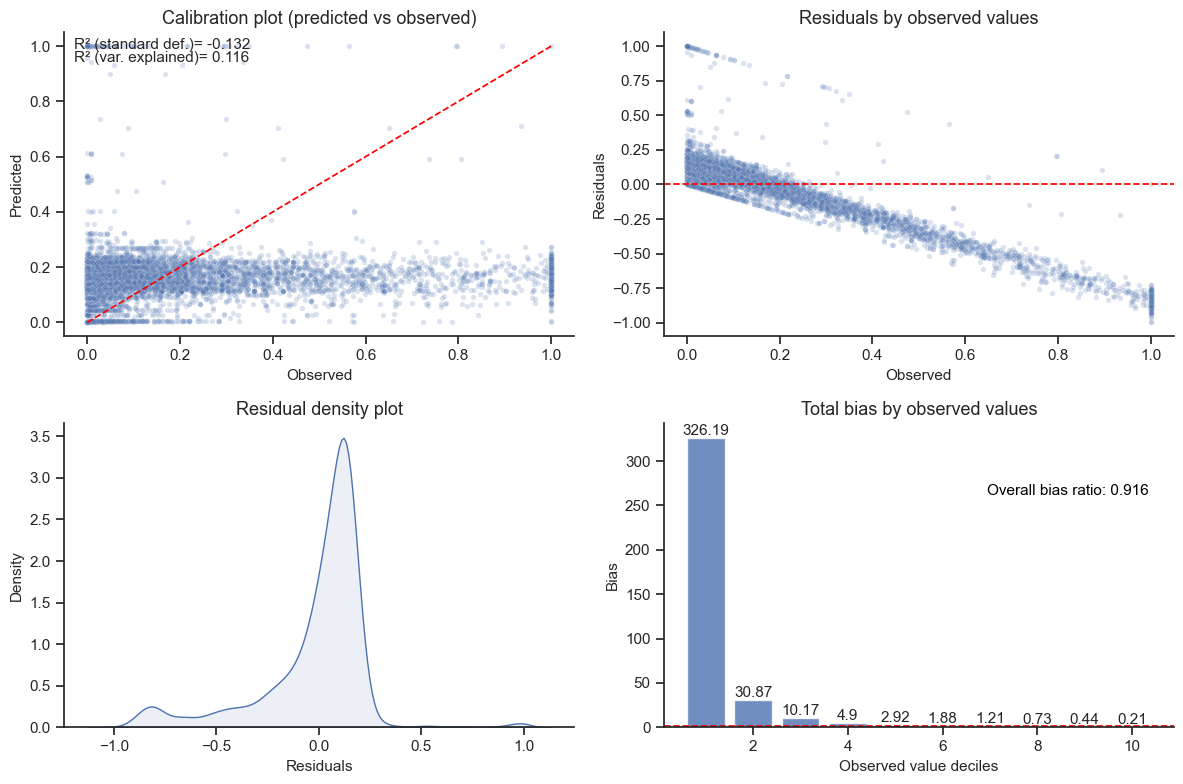

In [41]:
plot_calibration_and_residuals(
    y_true=y_true_spatial_cv,
    y_pred=y_pred_spatial_cv,
    y_residual=y_res_spatial_cv,
    metrics=state_metrics_all_spatial_cv,
)

In [ ]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_spatial_cv,
    y_pred=y_pred_spatial_cv,
    group_idx=level_2_idx_spatial_cv,
    group_mapping=level_2_mapping,
)

### Spatial CV: Approximation of change predictions

In [42]:
print_evaluation_metrics_crossval(metrics=change_metrics_spatial_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
    Test:  mean: -0.252 | min: -0.580 | max: 0.038
    Train: mean: -0.038 | min: -0.128 | max: 0.015
  - R² (variance explained):
    Test:  mean: 0.088 | min: 0.033 | max: 0.160
    Train: mean: 0.063 | min: 0.035 | max: 0.121
  - Mean absolute error:
    Test:  mean: 0.195 | min: 0.131 | max: 0.238
    Train: mean: 0.166 | min: 0.153 | max: 0.194
  - Median absolute error:
    Test:  mean: 0.129 | min: 0.078 | max: 0.151
    Train: mean: 0.110 | min: 0.099 | max: 0.134
  - Pearson correlation:
    Test:  mean: -0.073 | min: -0.298 | max: 0.195
    Train: mean: 0.062 | min: -0.163 | max: 0.176
  - Spearman correlation:
    Test:  mean: 0.003 | min: -0.216 | max: 0.276
    Train: mean: 0.104 | min: -0.122 | max: 0.257
  - Bias ratio (pred/obs):
    Test:  mean: -4.680 | min: -16.333 | max: 0.221
    Train: mean: 1.196 | min: -0.3

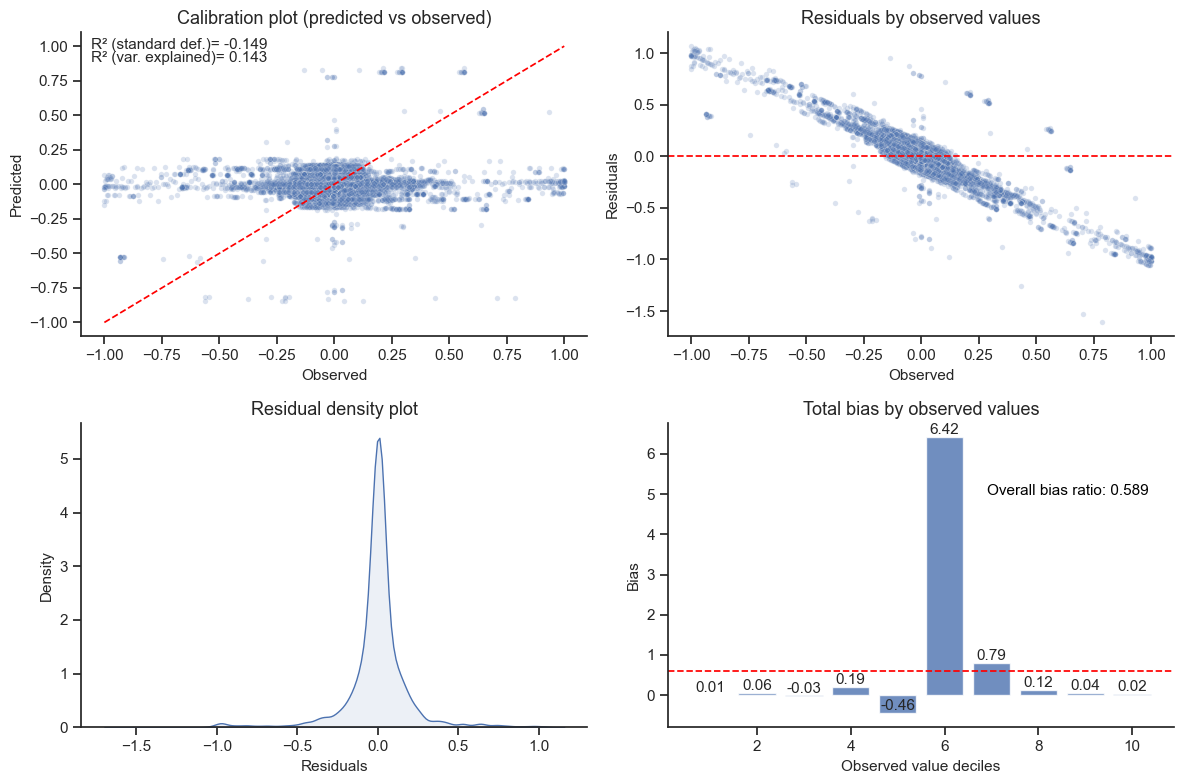

In [43]:
plot_calibration_and_residuals(
    y_true=y_true_change_spatial_cv,
    y_pred=y_pred_change_spatial_cv,
    y_residual=y_res_change_spatial_cv,
    metrics=change_metrics_all_spatial_cv,
)

## --- Environmental cross-validation evaluation ---